In [3]:
!pip install mido
!pip install h5py==2.10.0 --force-reinstall
!pip install pretty_midi
!pip install tensorflow==1.15.0
!pip install keras==2.3.1
!pip install midiutil

     |████████████████████████████████| 51 kB 4.2 MB/s 


In [9]:
from matplotlib import pyplot as plt
import os
import pandas
from midiutil.MidiFile import MIDIFile
import copy
import pretty_midi
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from keras.optimizers import SGD
from keras.initializers import VarianceScaling
import mido
from tqdm import tqdm
import scipy as sp
from sklearn.cluster import KMeans
import keras
import os
import json
import pandas
import tensorflow as tf
import numpy as np
from keras.layers import Dense
from keras import layers
from keras import optimizers
from keras.models import Sequential
import pickle
import pretty_midi
import mido
from tqdm import tqdm
import pickle
import copy

Using TensorFlow backend.


In [10]:
def get_meta(filename):
  with open('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_small/PPDD-Sep2018_sym_mono_small/descriptor/'+filename) as json_file:
    meta_data = json.load(json_file)
  return meta_data

In [11]:

csvfilenames=os.listdir('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_small/PPDD-Sep2018_sym_mono_small/prime_csv')
jsonfilenames=os.listdir('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_small/PPDD-Sep2018_sym_mono_small/descriptor')
midifilenames=os.listdir('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_small/PPDD-Sep2018_sym_mono_small/prime_midi')

midifilenames=sorted(midifilenames)
csvfilenames=sorted(csvfilenames)
jsonfilenames=sorted(jsonfilenames)



In [12]:


"""
with open('/content/drive/My Drive/MARG/PPDDlist/csvnamelist.txt', 'wb') as f:
  pickle.dump(csvfilenames, f)
with open('/content/drive/My Drive/MARG/PPDDlist/jsonnamelist.txt', 'wb') as f:
  pickle.dump(jsonfilenames, f)
with open('/content/drive/My Drive/MARG/PPDDlist/midinamelist.txt', 'wb') as f:
  pickle.dump(midifilenames, f)
"""

"\nwith open('/content/drive/My Drive/MARG/PPDDlist/csvnamelist.txt', 'wb') as f:\n  pickle.dump(csvfilenames, f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/jsonnamelist.txt', 'wb') as f:\n  pickle.dump(jsonfilenames, f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/midinamelist.txt', 'wb') as f:\n  pickle.dump(midifilenames, f)\n"

In [13]:
"""
with open('/content/drive/My Drive/MARG/PPDDlist/midilist.txt', 'rb') as f:
  midilist=pickle.load(f)
with open('/content/drive/My Drive/MARG/PPDDlist/csvlist.txt', 'rb') as f2:
  csvlist=pickle.load(f2)
with open('/content/drive/My Drive/MARG/PPDDlist/jsonlist.txt', 'rb') as f3:
  jsonlist=pickle.load(f3)
with open('/content/drive/My Drive/MARG/PPDDlist/prettymidilist.txt', 'rb') as f4:
  prettymidilist=pickle.load(f4)
"""

"\nwith open('/content/drive/My Drive/MARG/PPDDlist/midilist.txt', 'rb') as f:\n  midilist=pickle.load(f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/csvlist.txt', 'rb') as f2:\n  csvlist=pickle.load(f2)\nwith open('/content/drive/My Drive/MARG/PPDDlist/jsonlist.txt', 'rb') as f3:\n  jsonlist=pickle.load(f3)\nwith open('/content/drive/My Drive/MARG/PPDDlist/prettymidilist.txt', 'rb') as f4:\n  prettymidilist=pickle.load(f4)\n"

In [14]:
import pretty_midi
import mido
from tqdm import tqdm
midilist=[]
csvlist=[]
jsonlist=[]
prettymidilist=[]
for filenames in tqdm(midifilenames,position=0):
  midi_path='/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_small/PPDD-Sep2018_sym_mono_small/prime_midi/'+filenames
  mid = mido.MidiFile(midi_path, clip=True)
  midilist.append(mid)
  prettymid=pretty_midi.PrettyMIDI(midi_path)
  prettymidilist.append(prettymid)

for filenames in tqdm(csvfilenames,position=0):
  csv_path='/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_small/PPDD-Sep2018_sym_mono_small/prime_csv/'+filenames
  csv = pandas.read_csv(csv_path)
  csvlist.append(csv)
for filenames in tqdm(jsonfilenames,position=0):
  jsonlist.append(get_meta(filenames))

#midifilenames와 list들의 순서는 같다고 생각하고 코드 작성

100%|██████████| 100/100 [00:31<00:00,  3.19it/s]


In [15]:
"""
import pickle
with open('/content/drive/My Drive/MARG/PPDDlist/midilist.txt', 'wb') as f:
  pickle.dump(midilist, f)
with open('/content/drive/My Drive/MARG/PPDDlist/csvlist.txt', 'wb') as f:
  pickle.dump(csvlist, f)
with open('/content/drive/My Drive/MARG/PPDDlist/jsonlist.txt', 'wb') as f:
  pickle.dump(jsonlist, f)
with open('/content/drive/My Drive/MARG/PPDDlist/prettymidilist.txt', 'wb') as f:
  pickle.dump(prettymidilist, f)
"""

"\nimport pickle\nwith open('/content/drive/My Drive/MARG/PPDDlist/midilist.txt', 'wb') as f:\n  pickle.dump(midilist, f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/csvlist.txt', 'wb') as f:\n  pickle.dump(csvlist, f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/jsonlist.txt', 'wb') as f:\n  pickle.dump(jsonlist, f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/prettymidilist.txt', 'wb') as f:\n  pickle.dump(prettymidilist, f)\n"

아래의 코드는 csv기반의 Processing을 진행한다. 
MIDI 기반의 Processing은 다음 블록에 작성되어 있으며, 둘 중 하나만 굴리면 된다.

In [16]:
#현재 CSV dataset에 문제가 있어보인다..
"""
bar_list=[]
one_bar_number_list=[]
starting_number_list=[]
import numpy as np
for i,csvs in enumerate(tqdm(csvlist)):
  a=np.array([list(map(float,csvs.columns))])#column에도 숫자가 들어가 있어서.. 경우에 따라 조절한다
  b=np.array(csvs.values)
  csvarray=np.concatenate((a,b),axis=0)
  if('timeSignature' not in jsonlist[i]):
    jsonlist[i]['timeSignature']=[4,4]
  one_bar_number=jsonlist[i]['timeSignature'][0]
  bar_number=(csvarray[-1][0]-csvarray[0][0])//one_bar_number+1
  bar_info_list=[]
  for i in range(int(bar_number)):
    starting_bar_time=csvarray[0][0]+i*one_bar_number
    bar_info_list.append(csvarray[np.where( (starting_bar_time<=csvarray[:,0]) & (csvarray[:,0]<starting_bar_time+one_bar_number) )])
  bar_list.append(bar_info_list)
  one_bar_number_list.append(one_bar_number)
  starting_number_list.append(csvarray[0][0])
"""

"\nbar_list=[]\none_bar_number_list=[]\nstarting_number_list=[]\nimport numpy as np\nfor i,csvs in enumerate(tqdm(csvlist)):\n  a=np.array([list(map(float,csvs.columns))])#column에도 숫자가 들어가 있어서.. 경우에 따라 조절한다\n  b=np.array(csvs.values)\n  csvarray=np.concatenate((a,b),axis=0)\n  if('timeSignature' not in jsonlist[i]):\n    jsonlist[i]['timeSignature']=[4,4]\n  one_bar_number=jsonlist[i]['timeSignature'][0]\n  bar_number=(csvarray[-1][0]-csvarray[0][0])//one_bar_number+1\n  bar_info_list=[]\n  for i in range(int(bar_number)):\n    starting_bar_time=csvarray[0][0]+i*one_bar_number\n    bar_info_list.append(csvarray[np.where( (starting_bar_time<=csvarray[:,0]) & (csvarray[:,0]<starting_bar_time+one_bar_number) )])\n  bar_list.append(bar_info_list)\n  one_bar_number_list.append(one_bar_number)\n  starting_number_list.append(csvarray[0][0])\n"

In [17]:
#이게 이제 input을 midi로 받는 코드.
"""
possible_rhythms=[[11,8],[6,8],[8,12],[12,8],[8,4],[9,12],[3,2],[6,6],[3,6],[2,4],[1,2],[1,3],[1,4],[3,4],[5,4],[4,4],[9,8],[7,4],[11,4]]
possible_one_bar=[1,2,3,5,7,11]
"""
bar_list=[]
one_bar_number_list=[]
starting_number_list=[]
chord_list=[]
for i,songs in enumerate(prettymidilist):#곡마다.
  if('timeSignature' not in jsonlist[i]):
    jsonlist[i]['timeSignature']=[4,4]
  if(jsonlist[i]['timeSignature'] !=[4,4]):#!=[4,4]로 써서 4,4만고려가능
    pass
  else:
    for instrument in songs.instruments: #2. 어차피 instrument하나
      csvarray=[]
      for note in instrument.notes: #3
        row=[note.start*2, note.pitch, note.pitch, (note.end - note.start)*2, 0] #*2를 해줘야 제대로 하나의 bar가 하나의 단위가 된다.
        csvarray.append(row)
    csvarray=np.array(csvarray)
    one_bar_number=jsonlist[i]['timeSignature'][0]
    chord=jsonlist[i]['keyEstimate'][-5:]
    bar_number=(csvarray[-1][0]-csvarray[0][0])//one_bar_number+1
    bar_info_list=[]
    for i in range(int(bar_number)):
      starting_bar_time=csvarray[0][0]+i*one_bar_number
      bar_info_list.append(csvarray[np.where( (starting_bar_time<=csvarray[:,0]) & (csvarray[:,0]<starting_bar_time+one_bar_number) )])
    bar_list.append(bar_info_list)# bar info list가 bar마다 csv내용들 담겨져 있는거다.
    one_bar_number_list.append(one_bar_number)
    starting_number_list.append(csvarray[0][0])
    chord_list.append(chord)

In [18]:
"""
for bars in bar_list:
  #print(len(bars))결과 보면 다 다르다. 따라서 정해진 Shape가 없음
  for matrix in bars:
    for lists in matrix:
      if (lists[1]<24):
        print(lists[1])#Small Data기준 95가 최대, 25가 Minimum. Big Data로 바꾸면 추가적인 조절 가능할듯
"""

'\nfor bars in bar_list:\n  #print(len(bars))결과 보면 다 다르다. 따라서 정해진 Shape가 없음\n  for matrix in bars:\n    for lists in matrix:\n      if (lists[1]<24):\n        print(lists[1])#Small Data기준 95가 최대, 25가 Minimum. Big Data로 바꾸면 추가적인 조절 가능할듯\n'

In [19]:
print(bar_list[0][0])#1번째 곡의 1번째 bar.
print(jsonlist[0])

[[ 0.         33.         33.          0.83333333  0.        ]
 [ 1.         37.         37.          0.5         0.        ]
 [ 1.5        38.         38.          0.33333333  0.        ]
 [ 2.         40.         40.          0.83333333  0.        ]
 [ 3.         33.         33.          0.75        0.        ]]
{'id': '00b7561d-c09b-41f2-bf21-537603fbe758', 'idLakh': 'ac0c789d9798acc2cda1c90c28bddb3d', 'bpm': 135, 'timeSignature': [4, 4], 'keyEstimate': 'A major'}


In [20]:
def nearest_time(time,minimum_size):
  #혹시나 값이 조금 벗어나는 엇박 음을 가까운 최소단위로 Shifting한다.
  #다만 엇박 관련 Skill Detecting을 따로 고려할시 코드를 수정할 수 있다.
  num_to_multiply=time/minimum_size
  num_to_multiply=int(num_to_multiply)
  left_time=num_to_multiply*minimum_size
  right_time=left_time+minimum_size
  if (time-left_time>=right_time-time):
    return right_time
  return left_time
def bar_to_matrix1(bar,one_bar_number,starting_number,i):
  #그냥 점만 남긴다.
  #8/6박이면 one_bar_number가 8이다. 그러면 바 1개당 무조건 12개 처리하는거로 한다.
  #lists[0]은 시간, lists[1]은 Note 높이, lists[3]은 Duration. 
  init=np.zeros((112,96))#112는 Note의 수(감으로 써둠.. 나중에 전체 데이터로 할때 수정 가능성 있음 그런데 Shift를 잘 이용하면 96*96도 가능해보임.)
  minimum_size=one_bar_number/96
  zero_time=starting_number+one_bar_number*i    
  for j,lists in enumerate(bar):
    
    point=int((nearest_time(lists[0],minimum_size)-zero_time)/minimum_size)
    if(point==96):
      point=92
    
    init[111-int(lists[1])][point]=lists[3]#111-int(list[1])형태로 해야 직관적인 PianoRoll 형태가 ㅏ온다.
  return init
def bar_to_matrix2(bar,one_bar_number,starting_number,i):
  #Duration에 따라 Ploting한다.
  #8/6박이면 one_bar_number가 8이다. 그러면 바 1개당 무조건 12개 처리하는거로 한다.

  init=np.zeros((112,96))#112는 Note의 수(감으로 써둠.. 나중에 전체 데이터로 할때 수정 가능성 있음 그런데 Shift를 잘 이용하면 96*96도 가능해보임.)
  minimum_size=one_bar_number/96
  zero_time=starting_number+one_bar_number*i    
  for j,lists in enumerate(bar):
    #lists[0]은 시간, lists[1]은 Note 높이, lists[3]은 Duration. 
    point=int((nearest_time(lists[0],minimum_size)-zero_time)/minimum_size)
    length=int(round(lists[3]/minimum_size))
    if (length>3):
      length=length-1#여러번 두두두 치는 음을 구별하기 위함
    if (point+length>95):
      length=95-point # 한 음이 2Bar에 걸쳐있는 경우 Bar 뒤쪽의 음을 무시한다.
    init[111-int(lists[1])][point:point+length]+=1
  return init

def bar_to_matrix3(bar,one_bar_number,starting_number,i):
  #Duration에 따라 Ploting한다.
  #size를 상당히 작게 잡는다.
  #8/6박이면 one_bar_number가 8이다. 그러면 바 1개당 무조건 12개 처리하는거로 한다.

  init=np.zeros((24,24))#112는 Note의 수(감으로 써둠.. 나중에 전체 데이터로 할때 수정 가능성 있음 그런데 Shift를 잘 이용하면 96*96도 가능해보임.)
  minimum_size=one_bar_number/24
  zero_time=starting_number+one_bar_number*i
  min_height=500
  for lists in bar:
    if min_height>lists[1]:
      min_height=lists[1]    
  for j,lists in enumerate(bar):
    #lists[0]은 시간, lists[1]은 Note 높이, lists[3]은 Duration. 
    point=int((nearest_time(lists[0],minimum_size)-zero_time)/minimum_size)
    length=int(round(lists[3]/minimum_size))
    if (length>3):
      length=length-1#여러번 두두두 치는 음을 구별하기 위함
    if (point+length>23):
      length=23-point # 한 음이 2Bar에 걸쳐있는 경우 Bar 뒤쪽의 음을 무시한다.
    height=lists[1]-min_height
    while(height>23):
      height=height-12
    init[23-int(height)][point:point+length]+=1
  return init

In [21]:
#bar_list to bar_matrix_list
#bar_matrix_list=copy.deepcopy(bar_list)
#bar_matrix_list2=copy.deepcopy(bar_list)
bar_matrix_list3=copy.deepcopy(bar_list)
for i,songs in enumerate(bar_matrix_list3):
  for j,bar in enumerate(songs):
    #print(one_bar_number_list[i],starting_number_list[i])
    #matrix=bar_to_matrix1(bar,one_bar_number_list[i],starting_number_list[i],j)
    #matrix2=bar_to_matrix2(bar,one_bar_number_list[i],starting_number_list[i],j)
    matrix3=bar_to_matrix3(bar,one_bar_number_list[i],starting_number_list[i],j)
    #bar_matrix_list[i][j]=matrix
    #bar_matrix_list2[i][j]=matrix2
    bar_matrix_list3[i][j]=matrix3

In [22]:
def bar_to_contour(bar,one_bar_number,starting_number,j):
  contour=[]
  pitch_change_list=[]
  duration_list=[]
  real_pitch_list=[]
  real_time_list=[]
  real_duration_list=[]
  now_pitch=1000
  first_time=starting_number+one_bar_number*j
  a=0
  for lists in bar:
    if(a!=0): 
      real_time_list.append(lists[0]-now_rhythm)
    now_rhythm=lists[0]
    a+=1
    if (first_time*1.001<lists[0]):#smoothing for case like first time=5.00001, lists[0]=5.0000..
      resting_time=lists[0]-first_time
      duration_list.append(resting_time)
      first_time=lists[0]
      pitch_change_list.append('Rest')
    if (now_pitch==1000):
      pitch_change_list.append('Starting_Point')
      real_pitch_list.append('Starting_Point')
      real_duration_list.append(lists[3])
      duration_list.append(lists[3])
      first_time=first_time+lists[3]
      now_pitch=lists[1]
      a+=1
    else:
      pitch_change=lists[1]-now_pitch
      pitch_change_list.append(str(pitch_change))#나중에 int로 바꿔쓸 것. 자료형 터지는거 때문에 우선 스트링.
      duration_list.append(lists[3])
      real_duration_list.append(lists[3])
      first_time=first_time+lists[3]
      now_pitch=lists[1]
      real_pitch_list.append(str(pitch_change))
  if (first_time*1.001<starting_number+one_bar_number*(j+1)):
    pitch_change_list.append('Rest')#마지막 Rest
    duration_list.append(starting_number+one_bar_number*(j+1)-first_time)
  if(len(bar)!=0):
    real_time_list.append(starting_number+one_bar_number*(j+1)-now_rhythm)
  contour.append(pitch_change_list)
  contour.append(duration_list)
  contour.append(real_pitch_list)
  contour.append(real_time_list)
  contour.append(real_duration_list)
  #something
  return contour



Plot에서 중요한것은 Y-Axis의 0~112의 숫자가 Note의 반대 성향을 가진다는 것이다.(숫자가 커질수록 Note의 높이가 낮아진다.) 이는 PianoRoll을 이미지 처럼 사용하는 과정에서, 직관적인 학습이 가능하도록 이와 같이 구현한 것이다.

In [23]:
bar_contour_list=copy.deepcopy(bar_list)
for i,songs in enumerate(bar_list):
  for j,bar in enumerate(songs):
    contour=bar_to_contour(bar,one_bar_number_list[i],starting_number_list[i],j)
    bar_contour_list[i][j]=contour


bar_contour_list : 중간과정
bar_matrix_list2 : 아마 학습에 사용하게 될 Matrix의 List
bar_label_list : 학습에 사용하게 될 Label의 List

In [24]:
print(bar_contour_list[0][0])


[['Starting_Point', 'Rest', '4.0', '1.0', 'Rest', '2.0', 'Rest', '-7.0', 'Rest'], [0.8333333333333333, 0.16666666666666674, 0.5, 0.33333333333333326, 0.16666666666666674, 0.833333333333333, 0.16666666666666696, 0.75, 0.25], ['Starting_Point', '4.0', '1.0', '2.0', '-7.0'], [1.0, 0.5, 0.5, 1.0, 1.0], [0.8333333333333333, 0.5, 0.33333333333333326, 0.833333333333333, 0.75]]


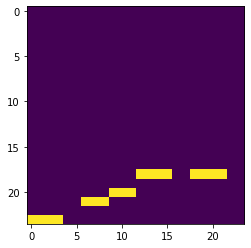

In [25]:
plt.imshow(np.array(bar_matrix_list3[30][1]),cmap='viridis')

Code for Clustering.


In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
trainX=[]
clusterxinfo=[]
trainY=[]#info of Time Signature or chord

for i,songs in enumerate(bar_matrix_list3):
  for matrix in songs:
    matrix=matrix.reshape(24,24)
    matrix=sp.ndimage.filters.gaussian_filter(matrix, [0.5,0.5], mode='constant') #bluring for well training.
    trainX.append(matrix)
    trainY.append(chord_list[i])#Ise one_bar_number_list to use info of time signature
trainX=np.array(trainX)
trainY=np.array(trainY)
clusterX=trainX[:100000]
clusterY=trainY[:100000]
le.fit(clusterY)
clusterY=le.transform(clusterY)
clusterX=clusterX.reshape((clusterX.shape[0],-1))
n_clusters=len(np.unique(clusterY))

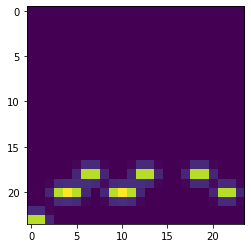

In [27]:
import matplotlib.pyplot as plt
plt.imshow(np.array(trainX[30]),cmap='viridis')

In [28]:
print(clusterX.shape)

(1505, 576)


In [29]:
from sklearn import metrics

kmeans = KMeans(n_clusters=5, n_init=10)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(clusterX)

metrics.accuracy_score(clusterY,y_pred_kmeans)

0.11029900332225914

In [30]:
dims = [clusterX.shape[-1], 500, 500, 2000, 10]
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = SGD(lr=1, momentum=0.9)
pretrain_epochs = 300
batch_size = 256

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [31]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.engine.topology import Layer, InputSpec
import keras.backend as K

def autoencoder(dims, act='relu', init='glorot_uniform'):

    n_stacks = len(dims) - 1
    # input
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    # internal layers in encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  # hidden layer, features are extracted from here

    x = encoded
    # internal layers in decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')


In [32]:
autoencoder, encoder = autoencoder(dims, init=init)
autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(clusterX, clusterX, batch_size=batch_size, epochs=100) #, callbacks=cb)
autoencoder.save_weights('/content/drive/My Drive/models/' + 'ae_weights.h5')


Epoch 1/100
1505/1505 [==============================] - 1s 476us/step - loss: 0.0143
Epoch 2/100
1505/1505 [==============================] - 0s 21us/step - loss: 0.0139
Epoch 3/100
1505/1505 [==============================] - 0s 20us/step - loss: 0.0134
Epoch 4/100
1505/1505 [==============================] - 0s 19us/step - loss: 0.0129
Epoch 5/100
1505/1505 [==============================] - 0s 20us/step - loss: 0.0126
Epoch 6/100
1505/1505 [==============================] - 0s 20us/step - loss: 0.0124
Epoch 7/100
1505/1505 [==============================] - 0s 20us/step - loss: 0.0123
Epoch 8/100
1505/1505 [==============================] - 0s 21us/step - loss: 0.0122
Epoch 9/100
1505/1505 [==============================] - 0s 21us/step - loss: 0.0122
Epoch 10/100
1505/1505 [==============================] - 0s 21us/step - loss: 0.0122
Epoch 11/100
1505/1505 [==============================] - 0s 20us/step - loss: 0.0122
Epoch 12/100
1505/1505 [==============================] - 0s 

In [33]:
print(clusterY)

[0 0 0 ... 0 0 0]


In [34]:
autoencoder.load_weights('/content/drive/My Drive/models/' + 'ae_weights.h5')

In [35]:
class ClusteringLayer(Layer):

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=(self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):

        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure each sample's 10 values add up to 1.
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

def autoencoder(dims, act='relu', init='glorot_uniform'):

    n_stacks = len(dims) - 1
    # input
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    # internal layers in encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  # hidden layer, features are extracted from here

    x = encoded
    # internal layers in decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')



In [36]:
n_clusters=5
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(clusterX))
y_pred_last = np.copy(y_pred)
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

loss = 0
index = 0
maxiter = 14000
update_interval = 140
index_array = np.arange(clusterX.shape[0])
tol = 0.001

In [37]:
def target_distribution(q):
  weight = q ** 2 / q.sum(0)
  return (weight.T / weight.sum(1)).T
for ite in range(14000):
    if ite % update_interval == 0:
        q = model.predict(clusterX, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p

        # evaluate the clustering performance
        y_pred = q.argmax(1)
        if clusterY is not None:
            acc = np.round(metrics.accuracy_score(clusterY, y_pred), 5)
            nmi = np.round(metrics.normalized_mutual_info_score(clusterY, y_pred), 5)
            ari = np.round(metrics.adjusted_rand_score(clusterY, y_pred), 5)
            loss = np.round(loss, 5)
            print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

        # check stop criterion - model convergence
        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, clusterX.shape[0])]
    loss = model.train_on_batch(x=clusterX[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= clusterX.shape[0] else 0

model.save_weights('/content/drive/My Drive/models/' + 'DEC_model_final.h5')
model.load_weights('/content/drive/My Drive/models/' + 'DEC_model_final.h5')

Iter 0: acc = 0.23056, nmi = 0.00943, ari = 0.01249  ; loss= 0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Iter 140: acc = 0.20664, nmi = 0.00593, ari = 0.01099  ; loss= 0.00078
Iter 280: acc = 0.16877, nmi = 0.00334, ari = 0.01117  ; loss= 0.00603
Iter 420: acc = 0.14086, nmi = 0.00391, ari = 0.01053  ; loss= 0.01425
Iter 560: acc = 0.11761, nmi = 0.00672, ari = 0.01145  ; loss= 0.0231
Iter 700: acc = 0.11761, nmi = 0.00657, ari = 0.01406  ; loss= 0.05027
Iter 840: acc = 0.11429, nmi = 0.00865, ari = 0.01319  ; loss= 0.07198
Iter 980: acc = 0.11030, nmi = 0.01015, ari = 0.01396  ; loss= 0.08694
Iter 1120: acc = 0.11761, nmi = 0.00918, ari = 0.01425  ; loss= 0.09147
Iter 1260: acc = 0.11694, nmi = 0.00954, ari = 0.01424  ; loss= 0.10466
Iter 1400: acc = 0.11827, nmi = 0.01136, ari = 0.01590  ; loss= 0.11764
Iter 1540: acc = 0.11894, nmi = 0.01090, ari = 0.01474  ; loss= 0.1109
Iter 1680: acc = 0.11827, nmi = 0.01085, ari = 0.01458  ; lo

In [38]:
q = model.predict(clusterX, verbose=0)
p = target_distribution(q)  # update the auxiliary target distribution p

# evaluate the clustering performance
y_pred = q.argmax(1)
if clusterY is not None:
    acc = np.round(metrics.accuracy_score(clusterY, y_pred), 5)
    nmi = np.round(metrics.normalized_mutual_info_score(clusterY, y_pred), 5)
    ari = np.round(metrics.adjusted_rand_score(clusterY, y_pred), 5)
    loss = np.round(loss, 5)
    print('Acc = %.5f, nmi = %.5f, ari = %.5f' % (acc, nmi, ari), ' ; loss=', loss)

Acc = 0.12027, nmi = 0.01091, ari = 0.01487  ; loss= 0.1195


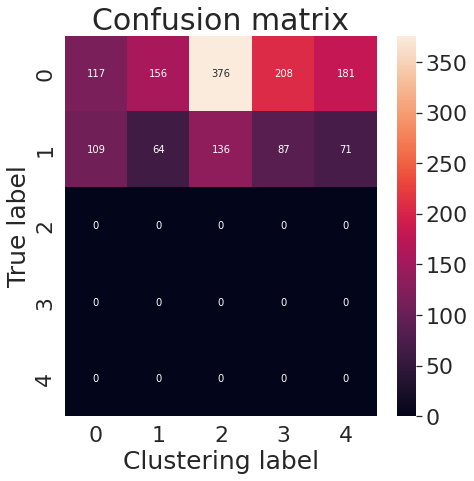

In [39]:
# chord scale과의 비교를 위한 코드. Label이 5개이므로 큰 의미는 없다.

sns.set(font_scale=2)
confusion_matrix = sklearn.metrics.confusion_matrix(clusterY, y_pred)

plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 10});
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()


In [40]:
cluster0=[]
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
for i,x in enumerate(y_pred):
  if x==0:
    cluster0.append(trainX[i])
  elif x==1:
    cluster1.append(trainX[i])
  elif x==2:
    cluster2.append(trainX[i])
  elif x==3:
    cluster3.append(trainX[i])
  elif x==4:
    cluster4.append(trainX[i])

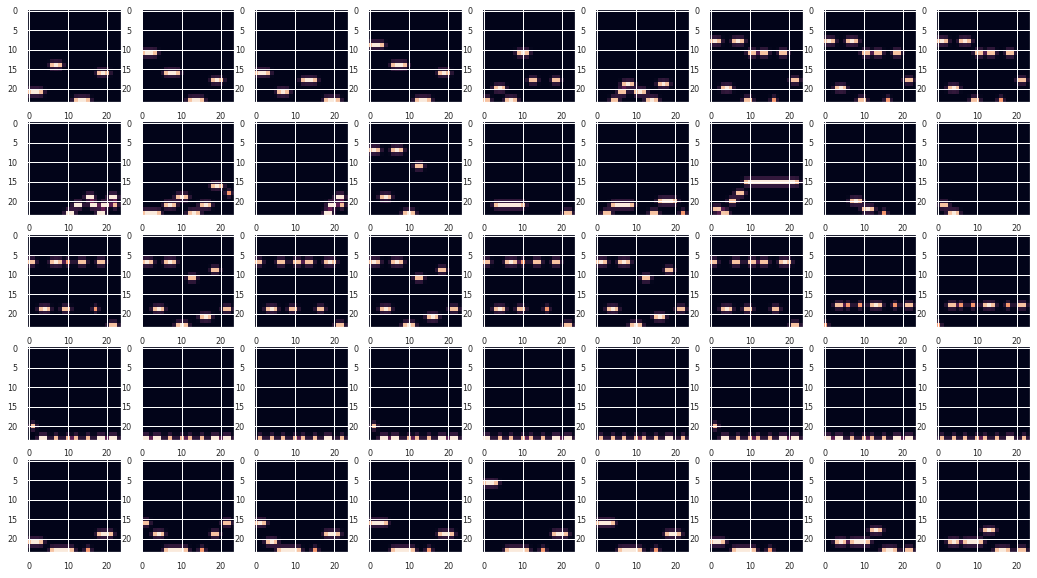

In [41]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig=plt.figure(figsize=(18, 10))
columns = 9
rows = 5
for i in range(1, columns*rows +1):
    if i<10:
      img = cluster0[i]
    elif i<19:
      img = cluster1[i]
    elif i<28:
      img = cluster2[i]
    elif i<37:
      img = cluster3[i]
    elif i<46:
      img = cluster4[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

Generation with GAN

Code by eriklindernoren,
https://github.com/eriklindernoren/Keras-GAN/blob/master/gan/gan.py

In [42]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

class GAN():
    def __init__(self):
        self.img_rows = 24
        self.img_cols = 24
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):
        with tf.device('/gpu:0'):
            model = Sequential()

            model.add(Dense(256, input_dim=self.latent_dim))
            model.add(LeakyReLU(alpha=0.2))
            model.add(BatchNormalization(momentum=0.8))
            model.add(Dense(512))
            model.add(LeakyReLU(alpha=0.2))
            model.add(BatchNormalization(momentum=0.8))
            model.add(Dense(1024))
            model.add(LeakyReLU(alpha=0.2))
            model.add(BatchNormalization(momentum=0.8))
            model.add(Dense(np.prod(self.img_shape), activation='tanh'))
            model.add(Reshape(self.img_shape))

            model.summary()

            noise = Input(shape=(self.latent_dim,))
            img = model(noise)

            return Model(noise, img)

    def build_discriminator(self):
        with tf.device('/gpu:0'):
            model = Sequential()

            model.add(Flatten(input_shape=self.img_shape))
            model.add(Dense(512))
            model.add(LeakyReLU(alpha=0.2))
            model.add(Dense(256))
            model.add(LeakyReLU(alpha=0.2))
            model.add(Dense(1, activation='sigmoid'))
            model.summary()

            img = Input(shape=self.img_shape)
            validity = model(img)

            return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset

        X_train=trainX
        X_train = X_train / (0.5) - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            if (epoch%500==0):
              print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("/content/drive/My Drive/images_RP/%d.png" % epoch)
        plt.close()



In [43]:
gan = GAN()
gan.train(epochs=100000, batch_size=32, sample_interval=200)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               295424    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 427,009
Trainable params: 427,009
Non-trainable params: 0
________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.544573, acc.: 93.75%] [G loss: 0.625412]


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500 [D loss: 0.692046, acc.: 48.44%] [G loss: 0.643656]
1000 [D loss: 0.686752, acc.: 50.00%] [G loss: 0.677010]
1500 [D loss: 0.679892, acc.: 60.94%] [G loss: 0.700121]
2000 [D loss: 0.692504, acc.: 50.00%] [G loss: 0.727155]
2500 [D loss: 0.666271, acc.: 71.88%] [G loss: 0.739509]
3000 [D loss: 0.677879, acc.: 59.38%] [G loss: 0.754794]
3500 [D loss: 0.674936, acc.: 60.94%] [G loss: 0.788207]
4000 [D loss: 0.633241, acc.: 73.44%] [G loss: 0.825446]
4500 [D loss: 0.665322, acc.: 64.06%] [G loss: 0.782826]
5000 [D loss: 0.651719, acc.: 60.94%] [G loss: 0.782659]
5500 [D loss: 0.638147, acc.: 65.62%] [G loss: 0.863594]
6000 [D loss: 0.638357, acc.: 65.62%] [G loss: 0.811864]
6500 [D loss: 0.622504, acc.: 67.19%] [G loss: 0.915894]
7000 [D loss: 0.580253, acc.: 79.69%] [G loss: 0.903272]
7500 [D loss: 0.578478, acc.: 68.75%] [G loss: 1.039063]
8000 [D loss: 0.493068, acc.: 85.94%] [G loss: 1.062099]
8500 [D loss: 0.523404, acc.: 85.94%] [G loss: 1.085049]
9000 [D loss: 0.528654, acc.: 76

In [44]:
noise = np.random.normal(0, 1, (100, 100))
gen_imgs = gan.generator.predict(noise)

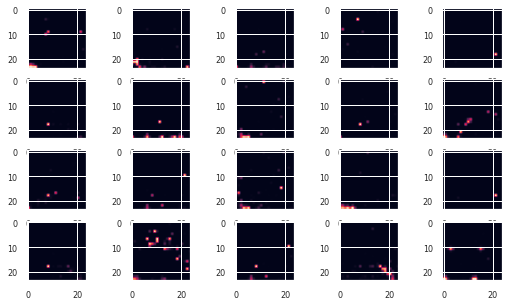

In [45]:
fig=plt.figure(figsize=(9, 5))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
    img = gen_imgs[i].reshape((24,24))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

classifier : 24*24 bar input을 기반하여 Skill을 분류한다. 학습은 Multilabel Classifier로써 진행된다.

updown_classifier : 24*24 bar input을 기반하여 다음 bar의 pitch change를 분류한다. 학습은 up, down, final, meanless 4가지 기반하여 진행되나 분류 자체는 up, down만 유의미하다.

RNNmodel : bar skill sequence를 기반하여 다음 bar가 어떤 스킬을 가지는지를 분류한다. 학습은 k-fold기반의 RNN으로 진행된다

G : GAN기반한 모델의 Generator이다. image_generator(G,갯수,encoded skill num)과 같은 형태로 사용하여 이미지를 생성할 수 있다. 원할한 생성을 위해 Matrix Image에 Bluring을 사용한다.

이제 G가 생성한 Matrix이미지를 0과1로 이루어진 Matrix로 정리하고, Chord를 Match시켜준 뒤 MIDI로 Decoding하면 끝이다.

In [46]:
import cv2
H=gen_imgs[0]#n개의 24*24*1 형태

def matrix_cleaner(matrix):
  #matrix should be size of 24*24
  #make matrix's value of [0,1]  
  matrix=np.matrix(matrix)
  maximum_value=matrix.max()
  minimum_value=matrix.min()
  matrix=(matrix-minimum_value)/(maximum_value-minimum_value)
  flat=matrix.flatten()
  flat.sort()
  flat=flat.reshape((576,1))
  hundred_val=flat[-100]
  matrix_for_duration=np.where(matrix<0.1,0,matrix)
  matrix=np.where(matrix<hundred_val,0,matrix)
  matrix=np.where(matrix<1/3,0,matrix)
  
  return matrix,matrix_for_duration

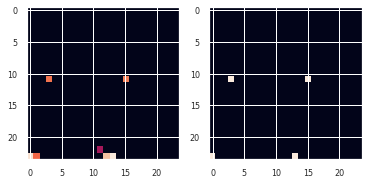

In [47]:
import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
import matplotlib.pyplot as pp

#getting a list of images
paws = [matrix_cleaner(H)[0]]


def detect_peaks(image):
    """
    Takes an image and detect the peaks usingthe local maximum filter.
    Returns a boolean mask of the peaks (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """

    # define an 8-connected neighborhood
    neighborhood = generate_binary_structure(2,2)

    #apply the local maximum filter; all pixel of maximal value 
    #in their neighborhood are set to 1
    local_max = maximum_filter(image, footprint=neighborhood)==image
    #local_max is a mask that contains the peaks we are 
    #looking for, but also the background.
    #In order to isolate the peaks we must remove the background from the mask.

    #we create the mask of the background
    background = (image==0)

    #a little technicality: we must erode the background in order to 
    #successfully subtract it form local_max, otherwise a line will 
    #appear along the background border (artifact of the local maximum filter)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    #we obtain the final mask, containing only peaks, 
    #by removing the background from the local_max mask (xor operation)
    detected_peaks = local_max ^ eroded_background
    detected_peaks=np.where(detected_peaks==True,1,0)

    return detected_peaks


#applying the detection and plotting results
for i, paw in enumerate(paws):
    detected_peaks = detect_peaks(paw)
    pp.subplot(1,2,(2*i+1))
    pp.imshow(paw)
    pp.subplot(1,2,(2*i+2) )
    pp.imshow(detected_peaks)

pp.show()

[[23  0]
 [11  3]
 [23 12]
 [11 15]] [2 1 1 2] [0.9732255  0.70785296 0.89418256 0.7421237 ]


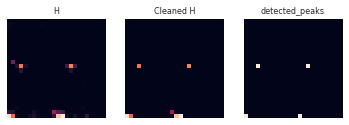

In [48]:
def left_shifting(matrix,detected_peak):
  #input은 detected_peak가 들어와야한다.
  dots=[]
  for j in range(len(detected_peak)):
    pos=[]
    for i in range(len(detected_peak[0])):#for 문의 순서를 이렇게 지정해야 Handle이 가능하다.
      a=0
      if(detected_peak[i][j]==1):
        if(j%2!=0 and j%3!=0):
          a=1
        if(len(pos)==0):
          pos=[i,j-a]
        else:
          if (matrix[0][pos[0]][pos[1]]<matrix[0][i][j-a]):
            pos=[i,j-a]
    if(len(pos)!=0):
      dots.append(pos)
  dots_with_length=[]
  starting_points=[]
  durations=[]
  velocities=[]
  for position in dots:
    velocities.append(matrix[1][position[0]][position[1]])
    length_val=0
    while True:
      if(length_val==0):
        starting_points.append([position[0],position[1]])
      else:
        if(position[1]+length_val>23):
          break
        if(detected_peak[position[0]][position[1]+length_val]!=0):
          break
      if(position[1]+length_val>23):
        break
      elif(matrix[1][position[0]][position[1]+length_val]!=0):
        dots_with_length.append([position[0],position[1]+length_val])
      else:
        break
      length_val+=1
    durations.append(length_val)
  result=np.zeros_like(matrix[0])
  for position in dots_with_length:
    result[position[0]][position[1]]=1
  return result,np.array(starting_points),np.array(durations),np.array(velocities)

paws = [matrix_cleaner(H)[0]]
detected_peaks = detect_peaks(paws[0])
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(H.reshape(24,24))
ax1.set_title('H')
ax1.axis("off")
 
ax3 = fig.add_subplot(1, 3, 2)
ax3.imshow(paws[0].reshape(24,24))
ax3.set_title('Cleaned H')
ax3.axis("off")

ax2 = fig.add_subplot(1, 3, 3)
ax2.imshow(detect_peaks(matrix_cleaner(H)[0]))
ax2.set_title('detected_peaks')
ax2.axis("off")
#plt.imshow(left_shifting(matrix_cleaner(H),detect_peaks(matrix_cleaner(H)[0]))[0])

print(left_shifting(matrix_cleaner(H),detected_peaks)[1],left_shifting(matrix_cleaner(H),detected_peaks)[2],left_shifting(matrix_cleaner(H),detected_peaks)[3])

In [49]:
C_chord=[1,0,1,0,1,1,0,1,0,1,0,1]
chords=['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
def chord_matching(shifted_matrix,chord,last_pitch,direction):
  #input은 left_shifting의 output을 그대로 넣고, chord(C,C#,D,D#....,B), 마지막 리듬의 pitch를 숫자로, 그리고 진행 방향을 direction(1,0)으로 받는다.
  #output은 MIDI기반의 decoding이 되도록 정보 기반으로, 그리고 last_pitch까지 넣어준다.
  #또한 출력 그림과 상관없이, 그냥 Note Pitch를 그냥 Matrix에 넣어준다.
  before_matrix=shifted_matrix[0]
  before_pitch=last_pitch
  if (last_pitch<40):
    direction=1
  if (last_pitch>80):
    direction=0
  if chord not in chords:
    now_chord='C'
  now_chord=chord
  chord_diff=chords.index(now_chord)
  now_chord_list=np.roll(C_chord,chord_diff)#[1,0,1,0,1...] 이런 set인데 여기에 맞추면 함수에 넣은 chord에 맞게 된다.
  #나중에 그냥 chord뿐만 아니라 화음의 종류까지 고민하게 된다면 이걸 잘 쓰면 된다.
  pitch_set=[]
  for pitchs in shifted_matrix[1]:
    pitch_set.append(23-pitchs[0])#위 그림 기준 7,17,9,7,3,5 이렇게 들감
  pitch_set=pitch_set-pitch_set[0]#이러면 0, 10, -1, 0 ,-4, -2, 이렇게 들간다. 상대적인 위치를 다루는게 쉽다.
  if (direction==1):
    possible_set=[]
    for i in range(12):
      possible_set.append(pitch_set+i+last_pitch)
  else:
    possible_set=[]
    for i in range(12):
      possible_set.append(pitch_set-i+last_pitch)
  possible_set_score=[]
  for sets in possible_set:
    score=0
    for pitchs in sets:
      score+=now_chord_list[pitchs%12]
    possible_set_score.append(score)
  final_set=possible_set[np.argmax(possible_set_score)]
  return_val=[]
  for i,sets in enumerate(final_set):
    if (before_pitch-sets<-12):
      sets=sets-12
    if (before_pitch-sets>12):
      sets=sets+12               #For prevent pitch change above 1 Octave.
    if(now_chord_list[sets%12]==1):
      final=[]
      if (shifted_matrix[2][i]!=0):
        final.append(sets)#pitch
        final.append(shifted_matrix[1][i][1])
        final.append(shifted_matrix[2][i])
        final.append(shifted_matrix[3][i])
        return_val.append(final)
    before_pitch=sets
  return return_val


In [50]:
shifted=left_shifting(matrix_cleaner(H),detect_peaks(matrix_cleaner(H)[0]))
print(chord_matching(shifted,'C',48,1))

[[48, 0, 2, 0.9732255], [60, 3, 1, 0.70785296], [48, 12, 1, 0.89418256], [60, 15, 2, 0.7421237]]


In [51]:
H=gen_imgs[0]
shifted=left_shifting(matrix_cleaner(H),detect_peaks(matrix_cleaner(H)[0]))
final_list=chord_matching(shifted,'C',48,1)
"""
generation_info(final_skill, length, chord)

final_skill should be 0~12. It matches with
['One_rhythm' 'continuing_rhythm' 'down_leaping' 'down_steping'
 'fast_rhythm' 'leaping_twisting' 'no skills' 'resting' 'staccato'
 'steping_twisting' 'triplet' 'up_leaping' 'up_steping'].
 length is the bar number of song generation.
 chord should be string, 'C', 'C#', 'D' ...
 major and minor chord is not considered now.
 but maybe I can handle with making all class as two type. ex)(major One_rhythm, minor One_rhythm..)
"""

"\ngeneration_info(final_skill, length, chord)\n\nfinal_skill should be 0~12. It matches with\n['One_rhythm' 'continuing_rhythm' 'down_leaping' 'down_steping'\n 'fast_rhythm' 'leaping_twisting' 'no skills' 'resting' 'staccato'\n 'steping_twisting' 'triplet' 'up_leaping' 'up_steping'].\n length is the bar number of song generation.\n chord should be string, 'C', 'C#', 'D' ...\n major and minor chord is not considered now.\n but maybe I can handle with making all class as two type. ex)(major One_rhythm, minor One_rhythm..)\n"

In [52]:
for i in final_list:
  print(i)

[48, 0, 2, 0.9732255]
[60, 3, 1, 0.70785296]
[48, 12, 1, 0.89418256]
[60, 15, 2, 0.7421237]


In [53]:
import midiutil
from midiutil.MidiFile import MIDIFile

for i in range(10):
  for chord in chords:
    H=gen_imgs[i]
    shifted=left_shifting(matrix_cleaner(H),detect_peaks(matrix_cleaner(H)[0]))
    final_list=chord_matching(shifted,chord,48,1)
    # create your MIDI object
    mf = MIDIFile(1)     # only 1 track
    track = 0   # the only track

    time = 0    # start at the beginning
    mf.addTrackName(track, time, "Sample Track")
    mf.addTempo(track, time, 120)#2초에 1bar

    # add some notes
    channel = 0
    used_time=[]
    for j,notes in enumerate(final_list):
      pitch = notes[0]+12           # C4 (middle C) 48이 C4인 내구현에 비해 여기는 60이 C4이다.
      time = notes[1]/6             # start on beat 0
      duration = notes[2]/6         # 1 beat long
      volume= int(notes[3]*100)
      if (time not in used_time and duration!=0):
        mf.addNote(track, channel, pitch, time, duration, volume)
        used_time.append(time)
    with open("/content/drive/My Drive/Relative Pitch/"+str(i)+' '+chord+".mid", 'wb') as outf:
      mf.writeFile(outf)
      print(str(i)+' '+chord+"  generate done!")

0 C  generate done!
0 C#  generate done!
0 D  generate done!
0 D#  generate done!
0 E  generate done!
0 F  generate done!
0 F#  generate done!
0 G  generate done!
0 G#  generate done!
0 A  generate done!
0 A#  generate done!
0 B  generate done!
1 C  generate done!
1 C#  generate done!
1 D  generate done!
1 D#  generate done!
1 E  generate done!
1 F  generate done!
1 F#  generate done!
1 G  generate done!
1 G#  generate done!
1 A  generate done!
1 A#  generate done!
1 B  generate done!
2 C  generate done!
2 C#  generate done!
2 D  generate done!
2 D#  generate done!
2 E  generate done!
2 F  generate done!
2 F#  generate done!
2 G  generate done!
2 G#  generate done!
2 A  generate done!
2 A#  generate done!
2 B  generate done!
3 C  generate done!
3 C#  generate done!
3 D  generate done!
3 D#  generate done!
3 E  generate done!
3 F  generate done!
3 F#  generate done!
3 G  generate done!
3 G#  generate done!
3 A  generate done!
3 A#  generate done!
3 B  generate done!
4 C  generate done!
